# Installation

- 파이썬 버젼 체크 (Python version Check)
- 파이토치 설치 (PyTorch Installation)
- 쿠다 및 CuDNN 체크 (Cuda & CuDNN Check)

## 1. Python Version Check
파이썬 버젼 체크

In [7]:
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


## 2. PyTorch Installation
- 구글 콜라브 버젼에 따라 파이토치가 설치되어 있을수도 있고 아닐 수도 있습니다.
- 설치가 안되어 있을 경우 아래와 같은 명령어로 설치하면 됩니다.
- !pip3 install torch torchvision

In [2]:
import torch

In [ ]:
!pip3 install torch torchvision

## 3. Cuda & cudnn Version Check
- 파이토치를 통해 각각 몇 버젼이 설치 되어있는지 확인해줍니다.

In [3]:
import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:1.9.0+cu111
cuda version: 11.1
cudnn version:8005


## 4. Command Line cuda & cudnn Check
- 쿠다 및 CuDNN 버젼은 커맨드라인 명령어로도 확인 가능합니다.

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [5]:
!cat /usr/include/x86_64-linux-gnu/cudnn_v*.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"
--
#define CUDNN_MAJOR 8
#define CUDNN_MINOR 0
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#endif /* CUDNN_VERSION_H */


# 5. PyTorch CPU & GPU Tensor Check
- 파이토치 텐서를 생성해봄으로써 제대로 설치 되었는지, 잘 동작하는지 확인해줍니다.

### 5-1 Create CPU tensor

In [6]:
# https://pytorch.org/docs/stable/torch.html?highlight=tensor#torch.tensor
# 0으로 차있는 2x3 형태의 텐서를 생성합니다.
cpu_tensor = torch.zeros(2,3)
print(cpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 5-2 Allocate tensor on GPU

In [9]:
# https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.device
# 어느 장치(cpu 혹은 gpu)에 텐서를 올릴지 지정합니다.
# 아래는 torch.device라는 함수를 사용해 gpu로 장치를 지정합니다. 
device = torch.device('cuda')

# https://pytorch.org/docs/stable/cuda.html?highlight=available#torch.cuda.is_available
# gpu가 사용 가능한지 확인해줍니다.
if torch.cuda.is_available():
  
  # https://pytorch.org/docs/stable/tensors.html?highlight=#torch.Tensor.to
  # cpu에 있었던 텐서를 to 함수를 이용해 지정해놓은 장치(여기서는 gpu)로 올려줍니다.

  ###################################################

  # 여기에 실습 코드를 적으시오
  gpu_tensor=cpu_tensor.to(device)
  print(gpu_tensor)
  ###################################################

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


### 5-3 Reallocate tensor back on CPU

In [10]:
# device 함수와 to 함수를 이용해 gpu에 있던 텐서를 다시 cpu로 옮겨올 수 있습니다.
cpu_tensor_back = gpu_tensor.to(torch.device('cpu'))
cpu_tensor_back

tensor([[0., 0., 0.],
        [0., 0., 0.]])

# 인공신경망 모델의 학습


## 필요한 라이브러리 불러오기

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [12]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

# 모델, 손실 함수, 최적화 함수 설정

In [13]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

###################################################

# 여기에 실습 코드를 적으시오
model=nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)
###################################################

## 모델의 학습

In [14]:
loss_array = []

###################################################

# 여기에 실습 코드를 적으시오
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()
  loss_array.append(loss)
###################################################

## 손실 그래프

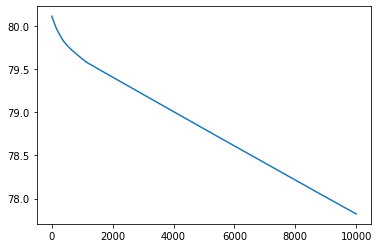

In [15]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

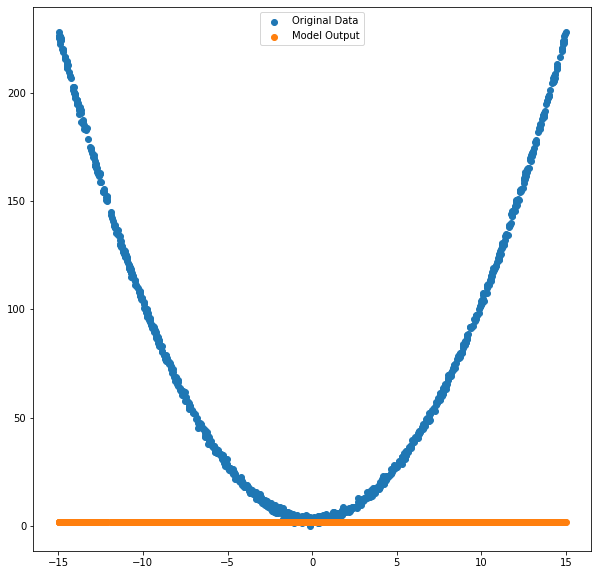

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

# 컨볼루션 인공신경망 Convolutional Neural Network
- MNIST 데이터
- 합성곱 연산(CNN) 
- 맥스풀링(Max Pooling)
- 완전연결 신경망(Fully Connected Network)

In [17]:
# 파이토치 및 토치비젼 설치
# 런타임을 GPU 모드로 바꿔서 실행하세요
!pip install torch torchvision

## 1. 학습전 세팅
### 1) 필요한 라이브러리 불러오기

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# https://pytorch.org/docs/stable/torchvision/datasets.html
# 파이토치에서는 torchvision.datasets에 MNIST 등의 다양한 데이터를 사용하기 용이하게 정리해놨습니다.
# 이를 사용하면 데이터를 따로 학습에 맞게 정리하거나 하지 않아도 바로 사용이 가능합니다.
import torchvision.datasets as dset

# https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transforms
# torchvision.transforms에는 이미지 데이터를 자르거나 확대 및 다양하게 변형시키는 함수들이 구현되어 있습니다. 
import torchvision.transforms as transforms

# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# DataLoader는 전처리가 끝난 데이터들을 지정한 배치 크기에 맞게 모아서 전달해주는 역할을 합니다.
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.9.0+cu111


### 2) 하이퍼파라미터 지정

In [68]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 15

## 2. 데이터

### 1) 데이터 다운로드

In [60]:
# https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=mnist#torchvision.datasets.MNIST
# 첫번째 인자 root는 데이터를 저장할 위치, train은 학습용 데이터인지 테스트용 데이터인지의 여부를 의미합니다.

# MNIST 데이터는 숫자 손글씨 이미지와 이에 대한 정답 쌍으로 이루어져 있습니다. 
# transform은 이미지에 대한 변형, target_transform은 정답 라벨에 대한 변형을 의미합니다.
# transform.ToTensor()는 PIL 이미지나 Numpy 배열을 토치 텐서로 바꿔줍니다.

# download는 데이터가 저장할 위치에 없을 경우 새로 다운받을지 여부입니다.
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### 2) 데이터셋 체크
- getitem을 사용해도 되고 
- 인덱싱으로도 데이터를 확인할 수 있습니다.

In [61]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

print(len(mnist_train),len(mnist_test))
#print(mnist_train[0])

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000
60000 10000


### 3) DataLoader 설정
- 사용할 데이터
- 배치 사이즈 (batch_size)
- 섞을지 여부 (shuffle)
- 사용할 프로세스 개수 (num_workers)
- 마지막에 남는 데이터의 처리 여부 (drop_last)

In [62]:
# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader

###################################################

# 여기에 실습 코드를 적으시오
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
###################################################


## 3. 모델, 손실함수, 최적화함수

### 1) CNN 모델

- 실습 코드는 PPT 참고

In [29]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


###################################################

# 여기에 실습 코드를 적으시오
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3,100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)

    out = self.fc_layer(out)
    return out
###################################################


### 2) 손실함수 & 최적화함수

In [31]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델을 지정한 장치로 올립니다.
model = CNN().to(device)

# 손실함수로는 크로스엔트로피를 사용합니다.
loss_func = nn.CrossEntropyLoss()

# 최적화함수로는 Adam을 사용합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


## 4. 학습 

In [32]:
loss_arr =[]

###################################################

# 여기에 실습 코드를 적으시오
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_= label.to(device)
    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()
    if j%1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())
###################################################


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(2.3005, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1851, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1095, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0808, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0355, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0846, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0555, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0426, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
#param_list = list(model.parameters())
#print(param_list)

## 5. 학습시 손실 시각화

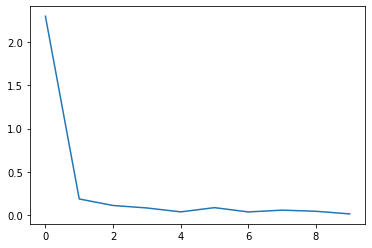

In [33]:
plt.plot(loss_arr)
plt.show()

## 6. 테스트 데이터 정확도 측정

In [36]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0


###################################################

# 여기에 실습 코드를 적으시오
with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y_= label.to(device)
    output = model.forward(x)
    _, output_index = torch.max(output, 1)
    total += label.size(0)
    correct += (output_index == y_).sum().float()
print("Accuracy of Test Data: {}%".format(100*correct/total))
###################################################



Accuracy of Test Data: 98.8581771850586%


# 실습 과제

### CNN 모델을 수정해보고, MNIST 판별 정확도 99%를 달성해 보시오. 


In [73]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


###################################################

# 여기에 실습 코드를 적으시오
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),#26,26
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),#24,24
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),#12
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),#10,10
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),#5
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),#3
        nn.ReLU(),
        
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3,128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)

    out = self.fc_layer(out)
    return out
###################################################


In [74]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델을 지정한 장치로 올립니다.
model = CNN().to(device)

# 손실함수로는 크로스엔트로피를 사용합니다.
loss_func = nn.CrossEntropyLoss()

# 최적화함수로는 Adam을 사용합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


In [75]:
loss_arr =[]

###################################################

# 여기에 실습 코드를 적으시오
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_= label.to(device)
    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()
    if j%1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())
###################################################


tensor(2.3060, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3193, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2195, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1372, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0455, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0660, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0326, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0421, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0468, device='cuda:0', grad_fn=<NllLossBackward>)


In [76]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0


###################################################

# 여기에 실습 코드를 적으시오
with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y_= label.to(device)
    output = model.forward(x)
    _, output_index = torch.max(output, 1)
    total += label.size(0)
    correct += (output_index == y_).sum().float()
print("Accuracy of Test Data: {}%".format(100*correct/total))
###################################################



Accuracy of Test Data: 98.94831848144531%
